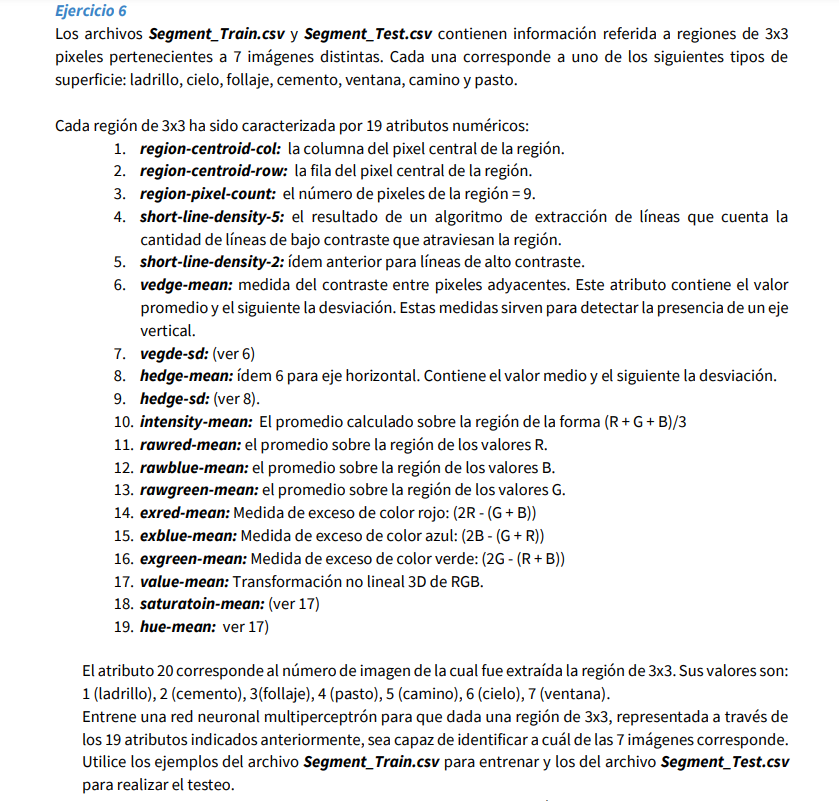

In [24]:
test_data="C:\\Users\\Usuario\\Documents\\fran\\Facultad\\Segundo cuatri 2024\\Deep-Learning\\Datos-Fuentes\\Datos\\Segment_Test.csv"

In [27]:
test_train="C:\\Users\\Usuario\\Documents\\fran\\Facultad\\Segundo cuatri 2024\\Deep-Learning\\Datos-Fuentes\\Datos\\Segment_Train.csv"

In [41]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [42]:
with open(test_data, 'rb') as f:
    result = chardet.detect(f.read())

In [43]:
with open(test_train, 'rb') as f:
    result = chardet.detect(f.read())

In [44]:
df_test = pd.read_csv(test_data, encoding=result['encoding'])
df_train=pd.read_csv(test_train, encoding=result['encoding'])

,index,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


,index,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


<Axes: >

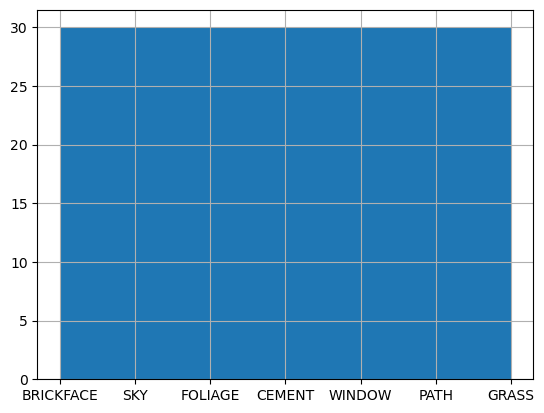

In [45]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()

# Para hacer una inspección rápida de los datos
display(df_train.head())
display(df_test.head())
df_train['index'].hist(bins=7)

In [56]:
x_train = np.array(df_train.iloc[:, 1:])  # Seleccionamos las primeras 19 columnas (atributos)
y_train = np.array(df_train.iloc[:, 0])   # Seleccionamos la columna de las clases (etiquetas)

# Lo mismo para los datos de prueba
x_test = np.array(df_test.iloc[:, 1:])    # Primeros 19 atributos para el conjunto de prueba
y_test = np.array(df_test.iloc[:, 0])     # Clases (etiquetas) para el conjunto de prueba

# ---- Aplicar One-hot Encoding a las clases con LabelBinarizer ----
binarizer = preprocessing.LabelBinarizer()  # Inicializamos el binarizador

# Convertimos las etiquetas en formato one-hot encoding
y_train = binarizer.fit_transform(y_train)  # Binarizamos las clases del conjunto de entrenamiento
y_test = binarizer.fit_transform(y_test)    # Binarizamos las clases del conjunto de prueba


Efectividad promedio entrenamiento = 94.28571428571428
Score promedio entrenamiento = 0.9285714285714286

Efectividad promedio testeo = 87.61904761904762
Score promedio testeo = 0.8902380952380953


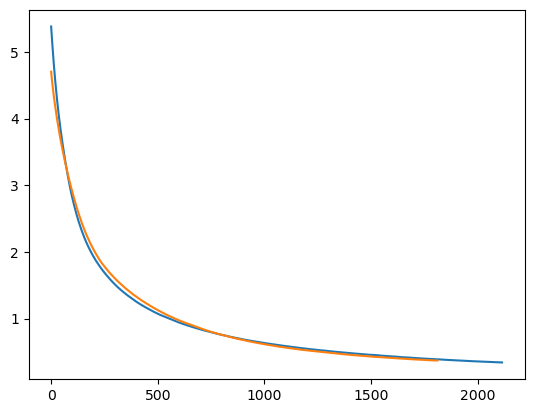

In [80]:
efective_test = 0
efective_training = 0
score_test = 0
score_training = 0
iteraciones = 2

for i in range(iteraciones):
    # Normalización
    scaler = preprocessing.StandardScaler()
    x_train = scaler.fit_transform(x_train)  # Ajustamos con los datos de entrenamiento
    x_test = scaler.transform(x_test)        # Solo transformamos los datos de prueba
    
    # Parámetros del modelo
    alfa = 0.01
    max_ite = 2500
    ocultas = (13)
    Funcion_activacion = "tanh"
    
    # Entrenamiento del modelo
    modelo = MLPClassifier(max_iter=max_ite, hidden_layer_sizes=ocultas, alpha=alfa,
                           solver='adam', activation=Funcion_activacion, tol=1e-4,
                           verbose=False).fit(x_train, y_train)
    
    # Predicción en el conjunto de entrenamiento
    y_pred = modelo.predict(x_train)
    score = modelo.score(x_train, y_train)

    # Invertimos la binarización para obtener los nombres originales de las clases
    y_clases = binarizer.inverse_transform(y_train)
    y_clase_pred = binarizer.inverse_transform(y_pred)

    # Acumulamos los resultados para calcular el promedio después
    efective_training += 100 * (y_clase_pred == y_clases).sum() / len(y_clases)
    score_training += score

    # Gráfica del modelo (curva de pérdida)
    plt.plot(modelo.loss_curve_)
    
    # Predicción en el conjunto de prueba
    y_pred_test = modelo.predict(x_test)
    score_test = modelo.score(x_test, y_test)

    y_class_test = binarizer.inverse_transform(y_test)
    y_class_test_pred = binarizer.inverse_transform(y_pred_test)

    # Acumulamos los resultados para el conjunto de prueba
    efective_test += 100 * (y_class_test_pred == y_class_test).sum() / len(y_class_test)
    score_test += score

# Imprimir resultados promediados
print(f"Efectividad promedio entrenamiento = {efective_training / iteraciones}")
print(f"Score promedio entrenamiento = {score_training / iteraciones}\n")

print(f"Efectividad promedio testeo = {efective_test / iteraciones}")
print(f"Score promedio testeo = {score_test / iteraciones}")

    

